 **Grocery Stores are a vital part of everyday life, providing us with the food and essentials as we need. Many people utilize grocery delivery applications to order their products, making it easy to shop from home.**

**Each transaction made through these applications is recorded in detail, creating a valuable dataset. This project looks at data from these transactions to understand how well these stores are performing.**

# **Importing Libraries**

In [3]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Reading Excel File**

In [4]:
df = pd.read_excel('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv.xlsx')
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
7254,OD7255,Ramesh,Beverages,Soft Drinks,Chennai,2/16/2016,East,1705,0.18,664.95,Tamil Nadu
4010,OD4011,James,Fruits & Veggies,Organic Fruits,Krishnagiri,12/27/2017,South,1825,0.18,273.75,Tamil Nadu
6490,OD6491,Amy,Food Grains,Organic Staples,Dindigul,11/18/2018,Central,1020,0.29,51.00,Tamil Nadu
4294,OD4295,Amrish,Snacks,Cookies,Nagercoil,11/25/2018,West,1657,0.28,364.54,Tamil Nadu
7508,OD7509,Vince,"Eggs, Meat & Fish",Chicken,Perambalur,2016-09-08 00:00:00,South,818,0.25,89.98,Tamil Nadu


# **Cleaning The Data**



In [5]:
#dropping Order ID Column
df.drop(['Order ID'], axis = 1, inplace = True)

In [6]:
df.shape

(9994, 10)

In [7]:
df.size

99940

In [8]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [9]:
df.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


In [11]:
df.isna().sum()

,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0
State,0


In [12]:
#sample Date from Order Date column
df["Order Date"].sample(5)

,Order Date
369,10/21/2017
338,2015-12-07 00:00:00
6601,2016-09-02 00:00:00
3604,4/19/2017
2693,2016-05-03 00:00:00


In [13]:
# Converting Order Date Column to Pandas DateTime Format
# By using (format="mixed") because Order Date has mixed format data (8/27/2016, 06-11-2016 etc.)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

In [14]:
# Sample Data from Order Date Column after transformation
df["Order Date"].sample(5)

,Order Date
8703,2018-02-20
5384,2018-07-31
7350,2018-06-02
8345,2016-01-05
4139,2018-03-06


In [15]:
# Extracting Year, Month and Date from OrderDate Column
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Date"] = df["Order Date"].dt.day

In [16]:
# We are extracting Discount Amount from Discount Percentage
# By using formula : CP = (SP*100/100-Discount%)
# And then we are subtracting CP from SP to get Discount Amount
df["Discount_Amt"] = round((df["Sales"]*100)/(100-(df["Discount"]*
100))).astype(int) - df["Sales"]

In [17]:
# Dropping Order Date Column
df.drop(["Order Date","Discount"], axis=1, inplace=True)

In [18]:
#Final DataFrame
df.head(5)

,Customer Name,Category,Sub Category,City,Region,Sales,Profit,State,Year,Month,Date,Discount_Amt
0,Harish,Oil & Masala,Masalas,Vellore,North,1254,401.28,Tamil Nadu,2017,8,11,171
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,149.80,Tamil Nadu,2017,8,11,164
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,165.20,Tamil Nadu,2017,12,6,627
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,89.60,Tamil Nadu,2016,11,10,299
4,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,918.45,Tamil Nadu,2016,11,10,827


# **Exploratory data analysis**
# Number of Product Sold in Each Category, Sub Category, City, Region, Year and Month


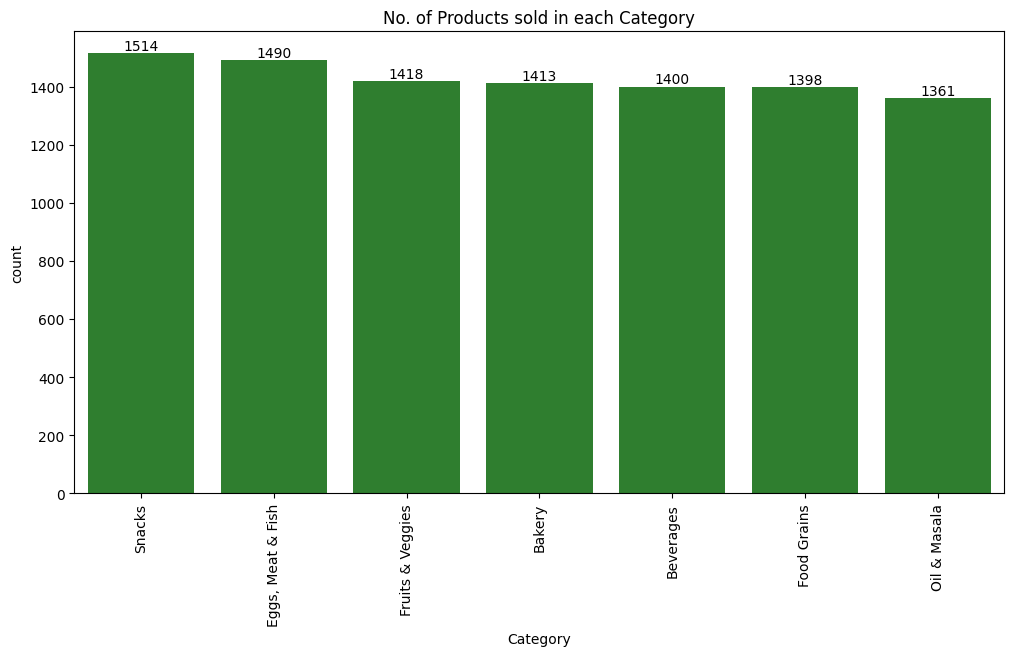

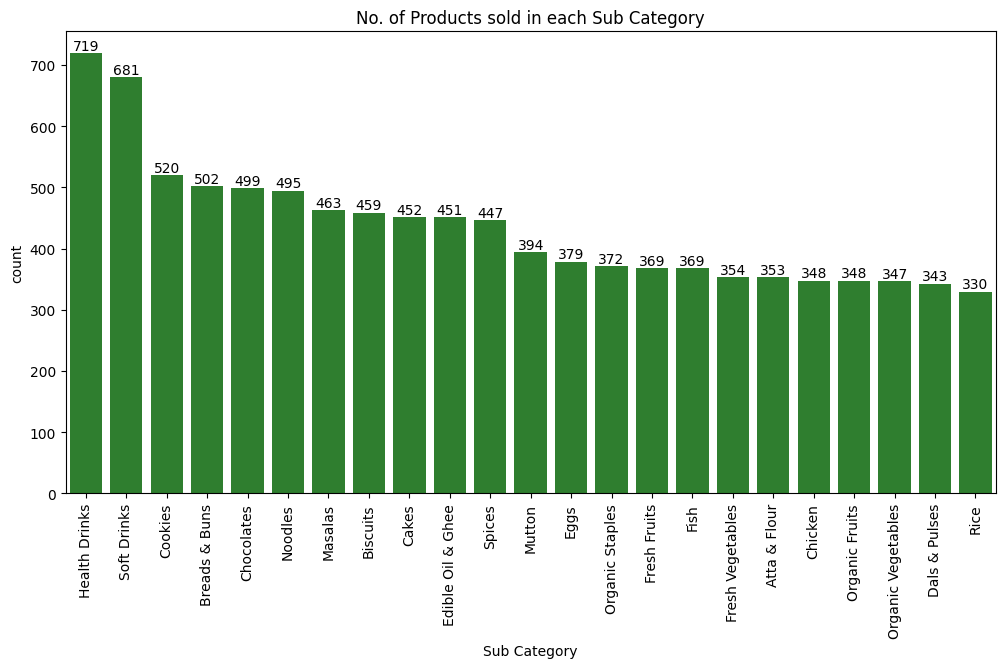

In [24]:
# No. of Products sold in each Category

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Category", color="#228B22", order=df["Category"].value_counts().index)
ax.set_title("No. of Products sold in each Category")
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


# No. of Products sold in each Sub Catehory

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Sub Category", color="#228B22", order=df["Sub Category"].value_counts().index)
ax.set_title("No. of Products sold in each Sub Category")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()



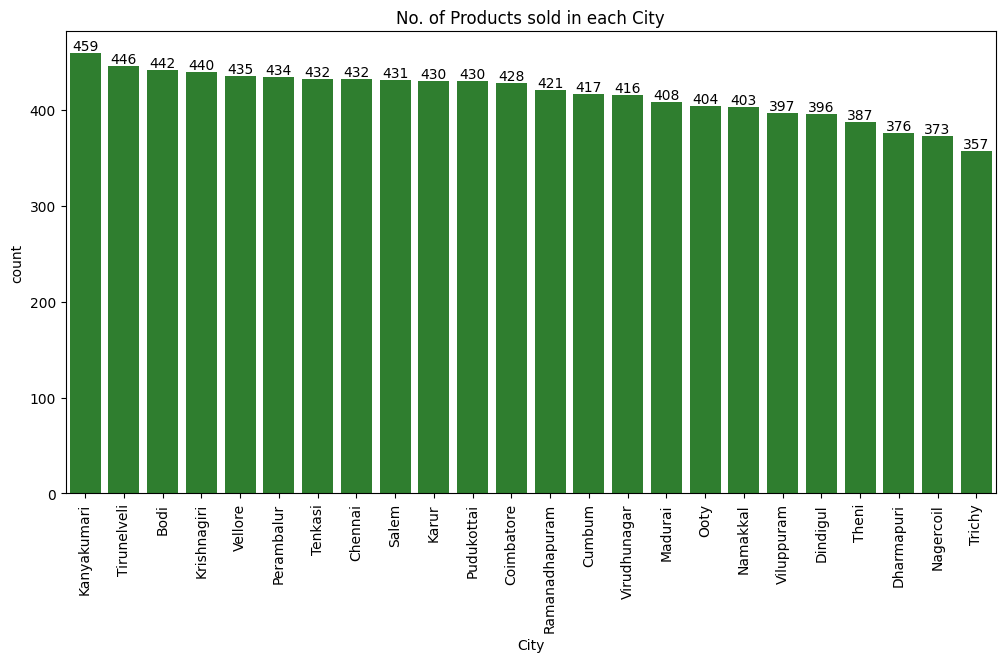

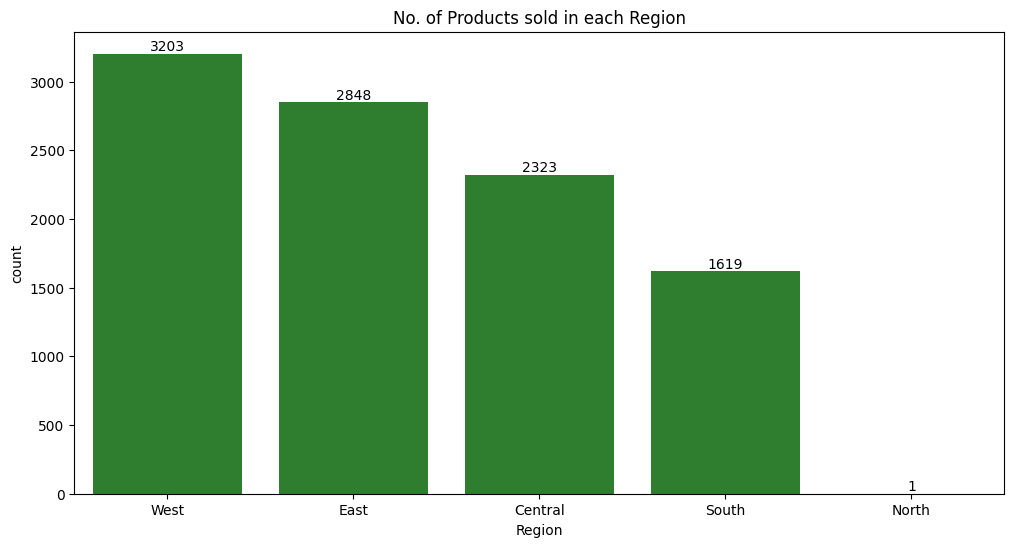

In [25]:
# No. of Products sold in each City

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="City", color="#228B22", order=df["City"].value_counts().index)
ax.set_title("No. of Products sold in each City")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


# No. of Products sold in each Region

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Region", color="#228B22", order=df["Region"].value_counts().index)
ax.set_title("No. of Products sold in each Region")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

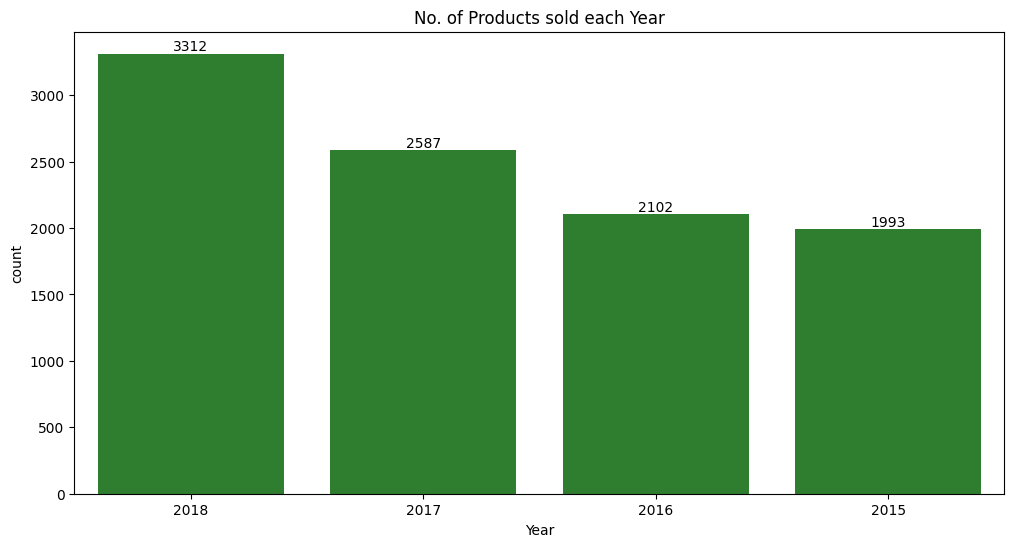

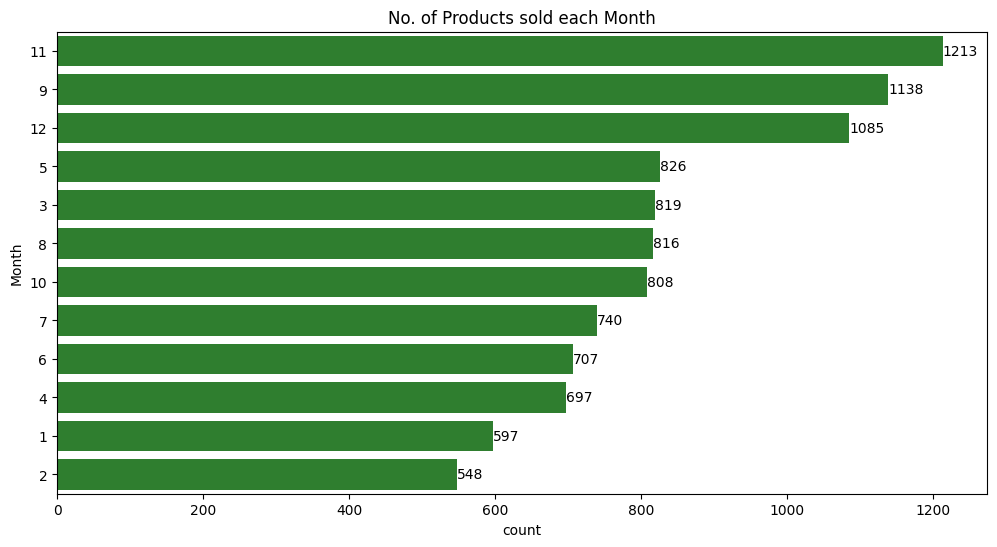

In [23]:
# No. of Products sold each Year and Month.

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Year", color="#228B22", order=df["Year"].value_counts().index)
ax.set_title("No. of Products sold each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, y="Month", color="#228B22", order=df["Month"].value_counts().index)
ax.set_title("No. of Products sold each Month")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# Total Sales in each Category, Sub Category, City, Region, Year and Month





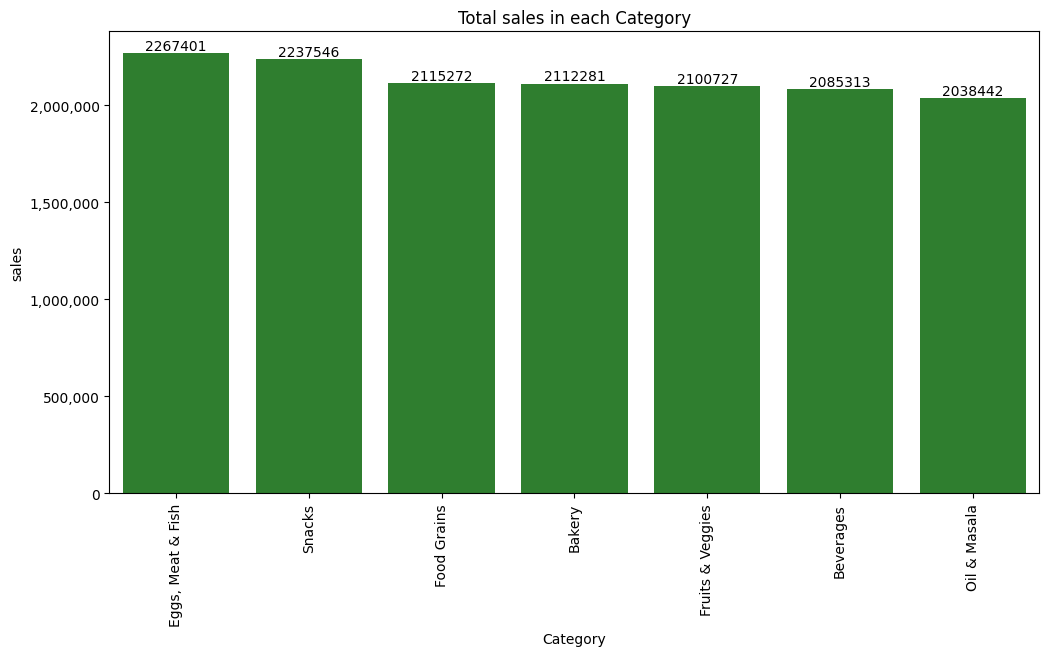

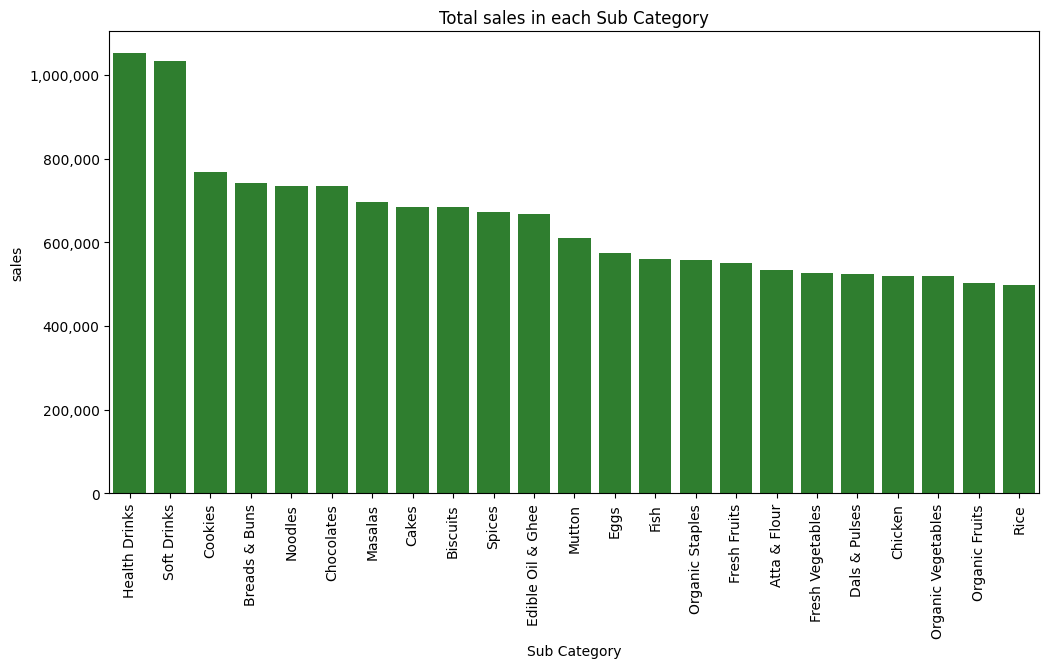

In [30]:
sales_by_category = df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

# Total Sales in each Category
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Category")

plt.show()


# Total sales in each Sub Category

sales_by_sub_category = df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_sub_category.index, y=sales_by_sub_category.values,
            color="#228B22", order=df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total sales in each Sub Category")

plt.show()



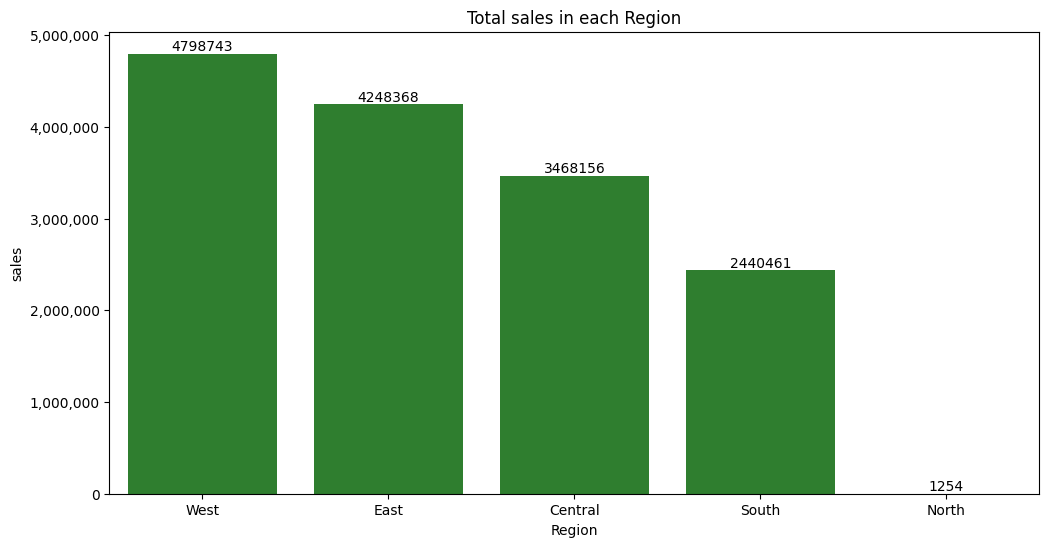

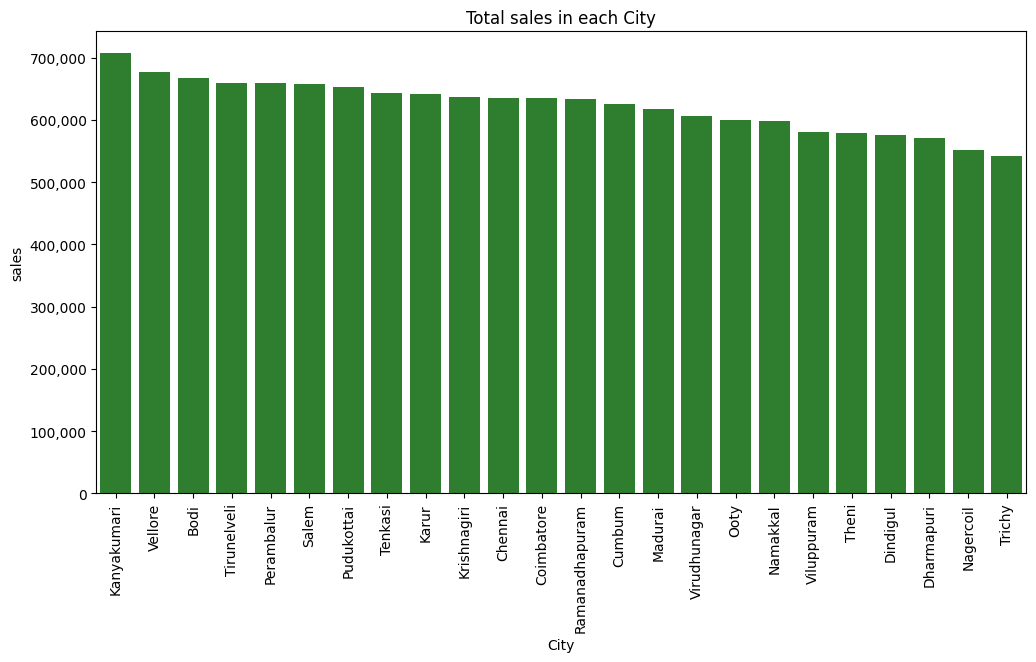

In [36]:
# Total sales in each Region
sales_by_region = df.groupby(["Region"])["Sales"].sum().sort_values(ascending
                                                                    =False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values,
            color="#228B22", order=df.groupby(["Region"])["Sales"].sum().sort_values(ascending
                                                                                     =False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Region")

plt.show()



# Total sales in each City
sales_by_city = df.groupby(["City"])["Sales"].sum().sort_values(ascending
                                                                =False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values,
            color="#228B22", order=df.groupby(["City"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total sales in each City")

plt.show()

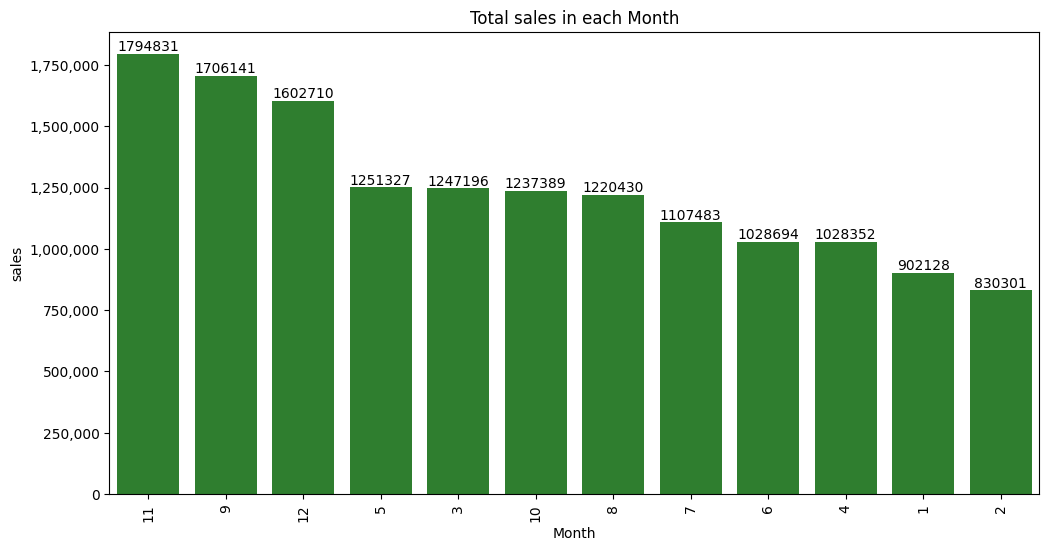

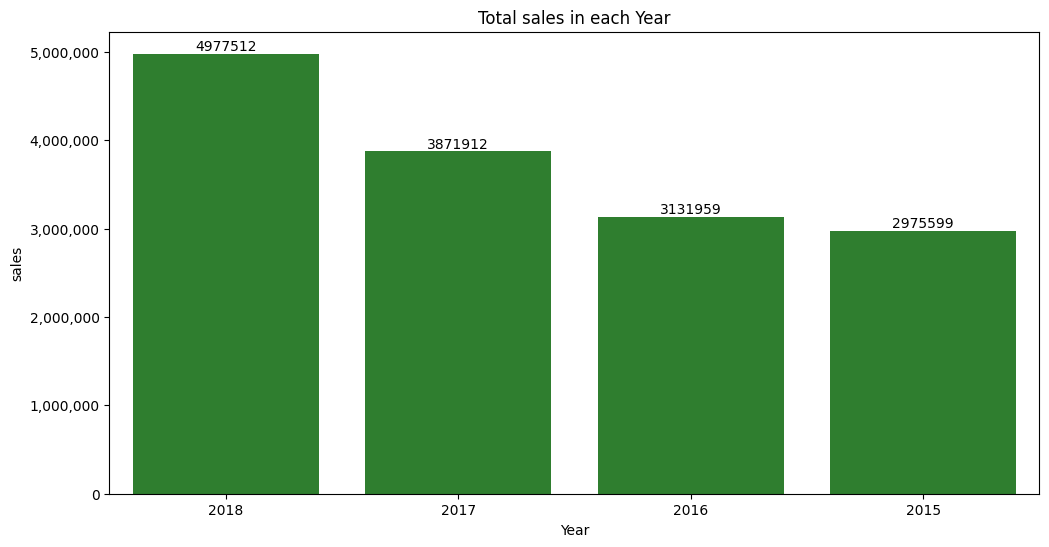

In [37]:
# Total sales in each Month
sales_by_month = df.groupby(["Month"])["Sales"].sum().sort_values(ascending
                                                                  =False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Sales"].sum().sort_values(ascending
                                                                                    =False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Month")

plt.show()


# Total sales in each Year
sales_by_year = df.groupby(["Year"])["Sales"].sum().sort_values(ascending
                                                                =False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values,
            color="#228B22", order=df.groupby(["Year"])["Sales"].sum().sort_values(ascending
                                                                                   =False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Year")

plt.show()

# Total Profit in each Category, Sub Category, City, Region, Year and Month

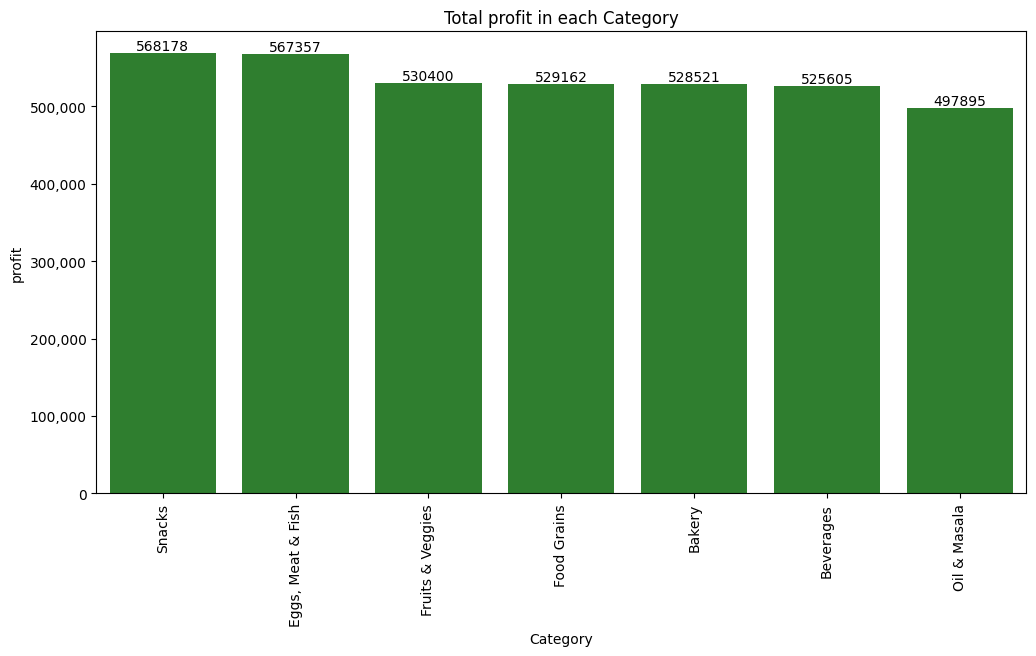

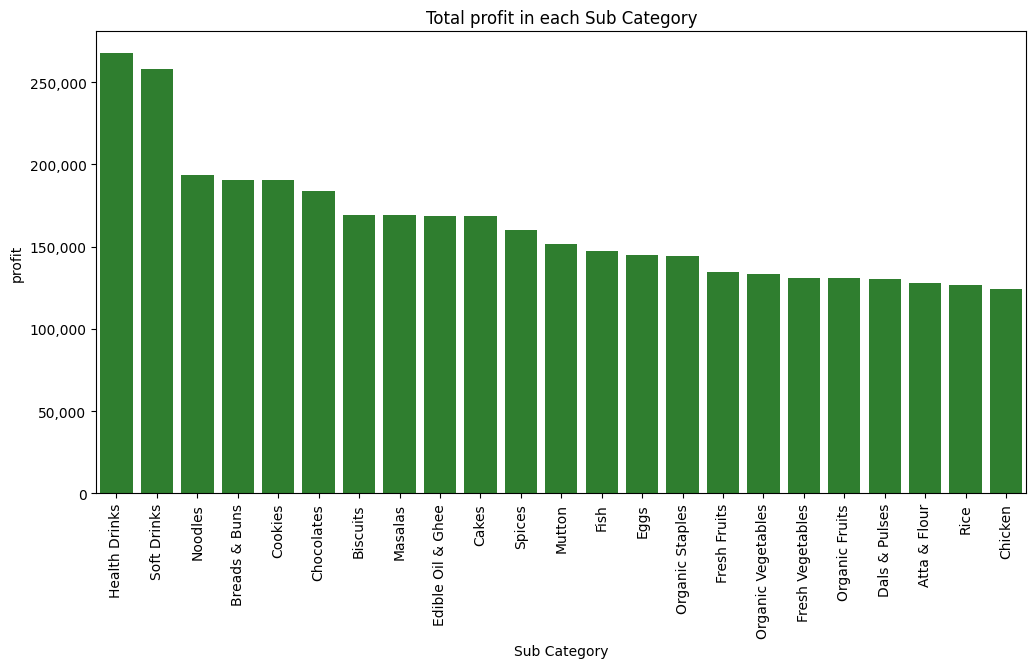

In [38]:
# Total profit in each Category
profit_by_category = df.groupby(["Category"])["Profit"].sum().sort_values(ascending
                                                                          =False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Profit"].sum().sort_values(ascending
                                                                                        =False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Category")

plt.show()


# Total profit in each Sub Category
profit_by_sub_category = df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending
                                                                                  =False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_sub_category.index, y=profit_by_sub_category.values,
            color="#228B22", order=df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending
                                                                                            =False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total profit in each Sub Category")

plt.show()


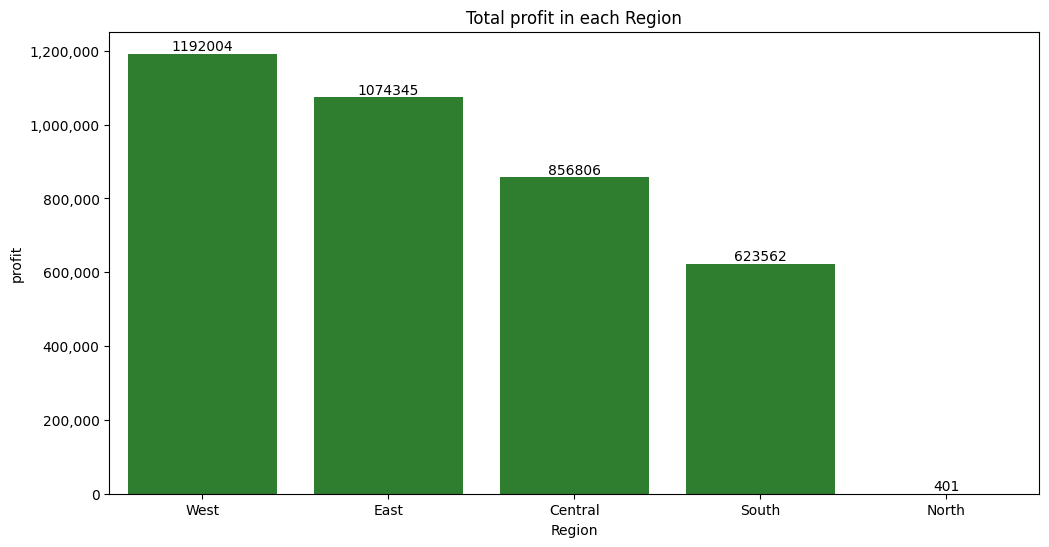

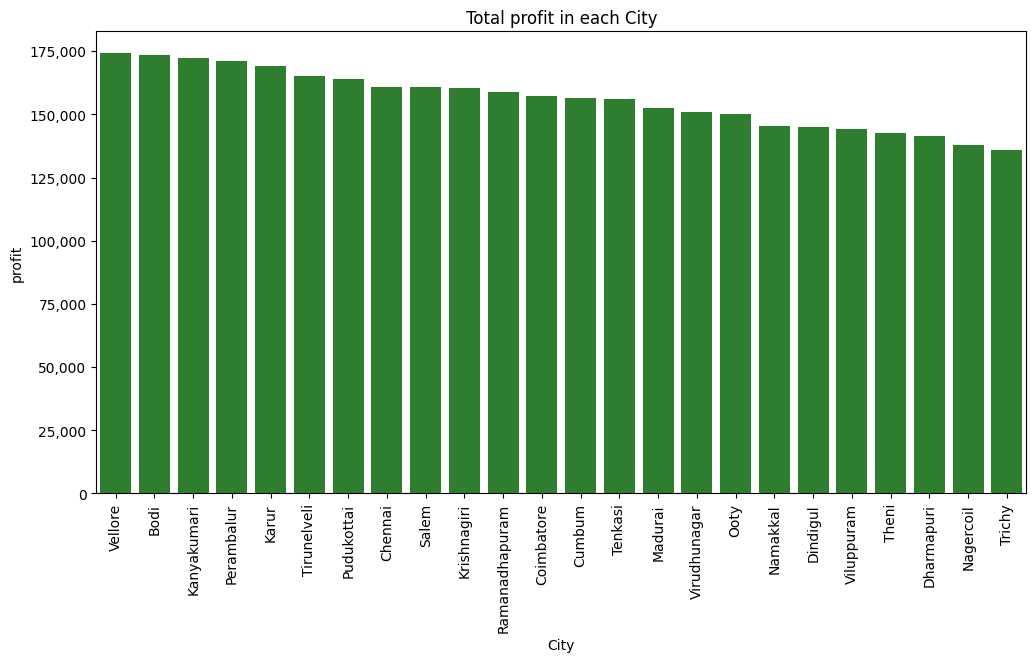

In [39]:
# Total profit in each Region
profit_by_region = df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values,
            color="#228B22", order=df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Region")

plt.show()



# Total profit in each City
profit_by_city = df.groupby(["City"])["Profit"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_city.index, y=profit_by_city.values,
            color="#228B22", order=df.groupby(["City"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total profit in each City")

plt.show()

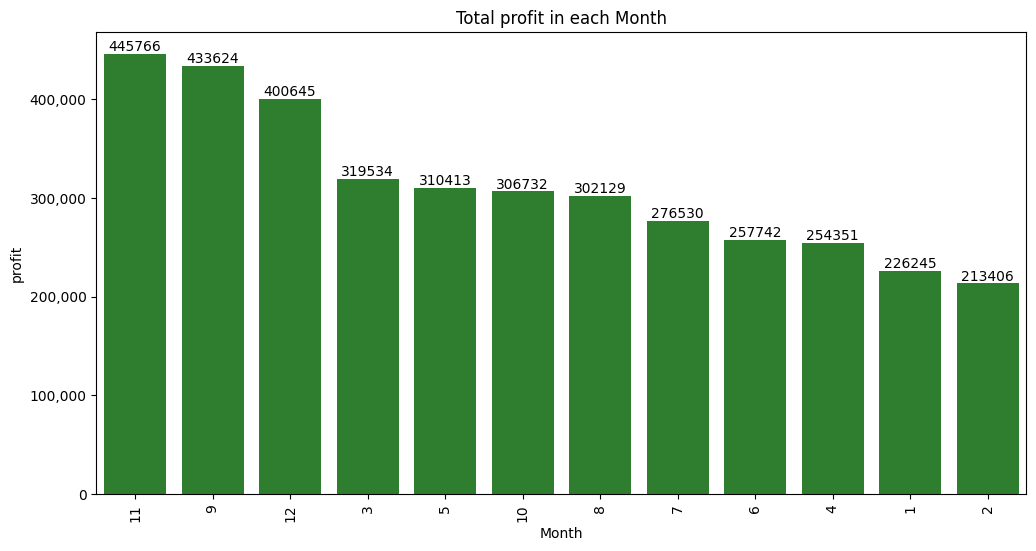

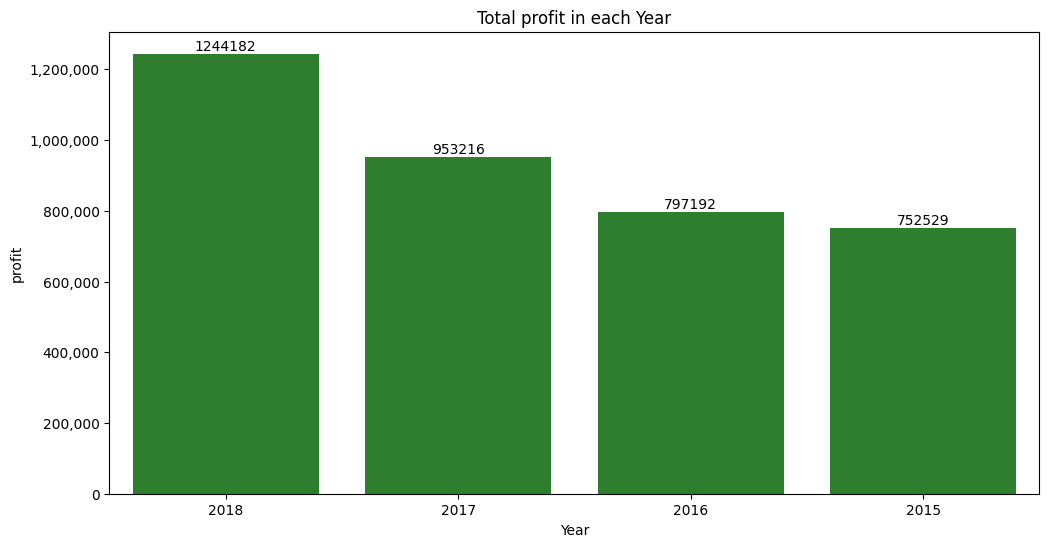

In [40]:
# Total profit in each Month
profit_by_month = df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_month.index, y=profit_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Month")

plt.show()

# Total profit in each Year
profit_by_year = df.groupby(["Year"])["Profit"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_year.index, y=profit_by_year.values,
            color="#228B22", order=df.groupby(["Year"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Year")

plt.show()

# Customers with Highest Amount of Total Sales




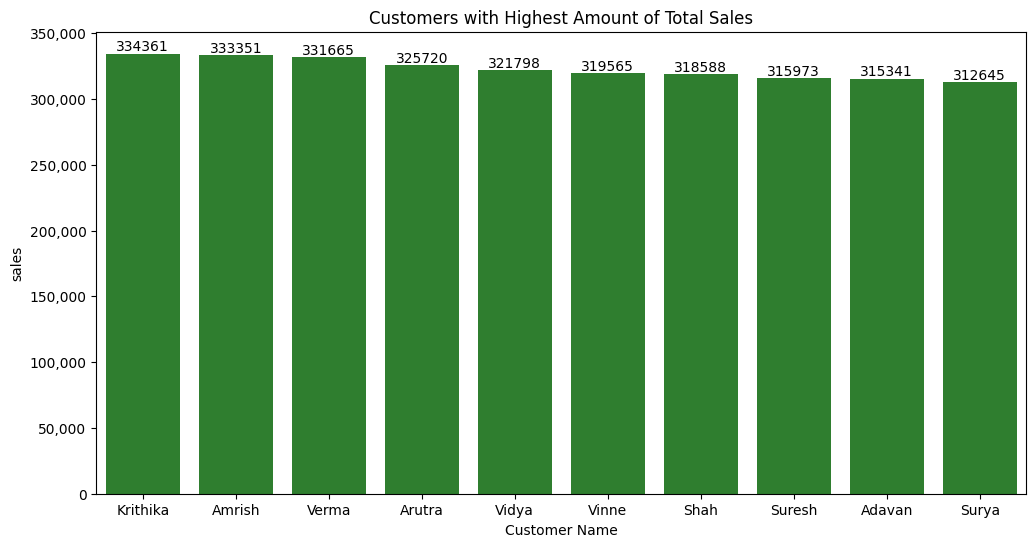

In [42]:
highest_total_sales_by_customers = df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending
                                                                                            =False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=highest_total_sales_by_customers.index, y=highest_total_sales_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending=False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Customers with Highest Amount of Total Sales")

plt.show()



# Customers with Highest Profit on their Purchase



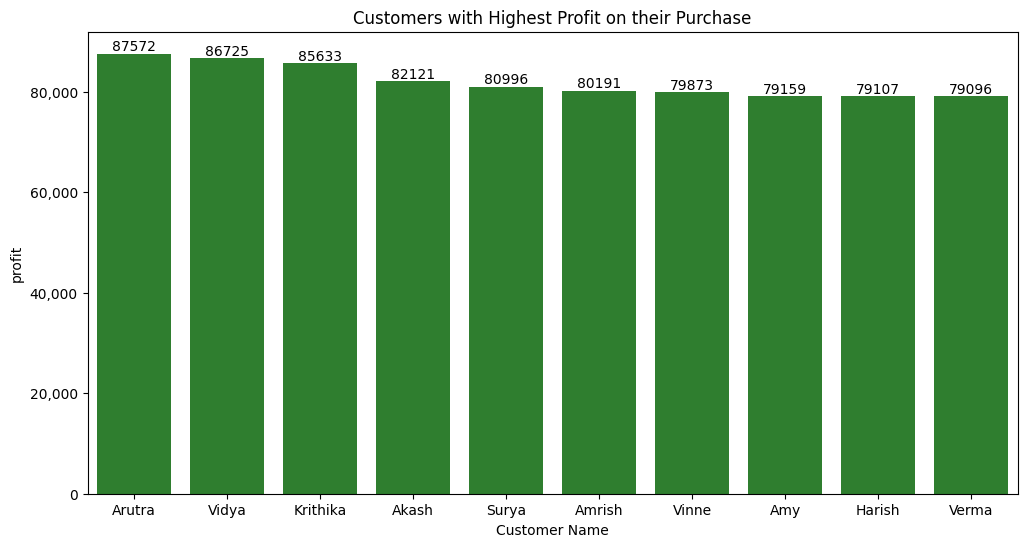

In [41]:
profit_on_purchase_by_customers = df.groupby(["Customer Name"])["Profit"].sum().sort_values(ascending
                                                                                            =False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_on_purchase_by_customers.index, y=profit_on_purchase_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Profit"].sum().sort_values(ascending
                                                                                             =False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Customers with Highest Profit on their Purchase")

plt.show()





# Total Discount availed by Customers




In [43]:
discount_availed_by_customers = df.groupby(["Customer Name"])["Discount_Amt"].sum().sort_values(ascending
                                                                                                =False).head(10)

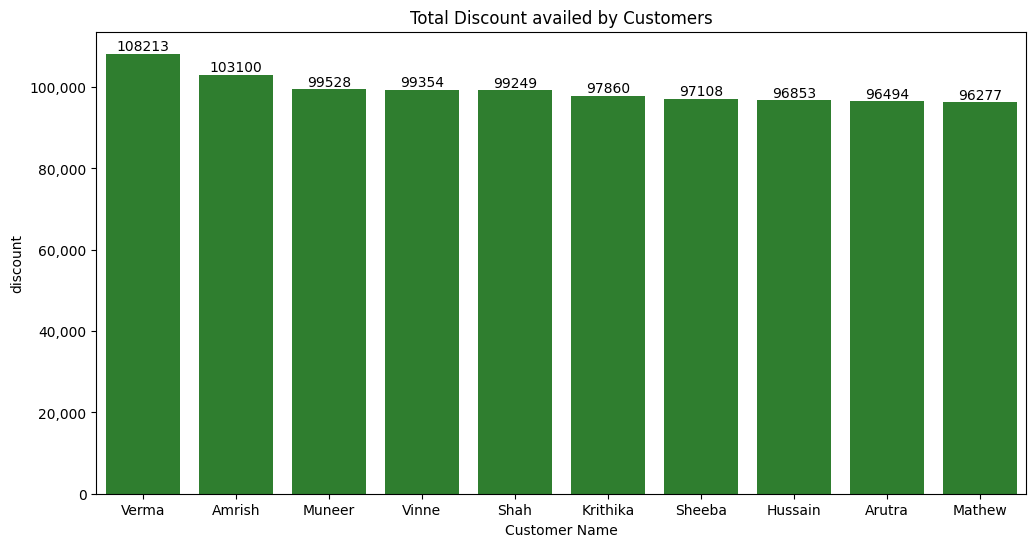

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=discount_availed_by_customers.index, y=discount_availed_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Discount_Amt"].sum().sort_values(ascending=False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('discount')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total Discount availed by Customers")

plt.show()
